Problem Statement:
We want to figure out the best way to sell loans to our existing customers in 2023. Specifically, we have two types of loans: cash loans (also called upsell loans) and TV upgrades (also called upgrade loans). Our goal is to maximize the total profit by selling the right mix of these loans.

Assumptions:
Eligibility:
90% of customers can get a cash loan.
75% of customers who haven’t purchased any upsell loans are eligible for a TV upgrade. This percentage decreases if they’ve already bought cash loans.

Loan Types:
Cash loans last for 150 days and extend the finished payment date of the original loan by 50 days.
TV upgrades cannot be upsold.
Loans that have finished payment cannot get cash loans.
TV upgrades must be purchased the day the original loan is finished.

Profit:
Cash loans make a profit of $25 (on the day of sale).
TV upgrades make a profit of $150 (also on the day of sale).

Discount Rate:
We’ll use an annual discount rate of 15%.
Ignore Post-2023 Impact:
We won’t consider anything beyond 2023.
Approach:


Objective Function:
We’ll create a mathematical function that represents our goal: maximizing total profit.
Constraints:
We’ll set up rules based on eligibility, loan types, and finished payment dates.
Optimization:
We’ll use techniques like linear programming or dynamic programming to find the best mix of loans.
Profit Calculation:
Once we know the optimal mix, we’ll calculate the total profit.
Sensitivity Analysis:
We’ll identify critical assumptions and suggest ways to improve profitability.

In [40]:
! pip install pandas matplotlib


In [41]:
import pandas as pd

# Load data into a Pandas DataFrame
df = pd.read_csv('sales_data.csv')


In [42]:
df.head()

,Unnamed: 0,Upsell,Increasing instalment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,NaN,Upgrade,Increasing term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Sales, by month",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Month,1/31/19,2/28/19,3/31/19,4/30/19,5/31/19,6/30/19,7/31/19,8/31/19,...,3/31/23,4/30/23,5/31/23,6/30/23,7/31/23,8/31/23,9/30/23,10/31/23,11/30/23,12/31/23


Transposed the data in excel then exported

In [43]:
import pandas as pd

# Load data into a Pandas DataFrame
df_1= pd.read_csv('sales_data _transposed.csv')

In [44]:
df_1.head()

,Month,Volume (units)
0,1/31/19,10000
1,2/28/19,10200
2,3/31/19,10404
3,4/30/19,10612
4,5/31/19,10824


In [45]:
df_1.columns


Index(['Month', 'Volume (units)'], dtype='object')

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Month' to datetime format
df_1['Month'] = pd.to_datetime(df_1['Month'], format='%m/%d/%y')




In [47]:
df_1.head()

,Month,Volume (units)
0,2019-01-31,10000
1,2019-02-28,10200
2,2019-03-31,10404
3,2019-04-30,10612
4,2019-05-31,10824


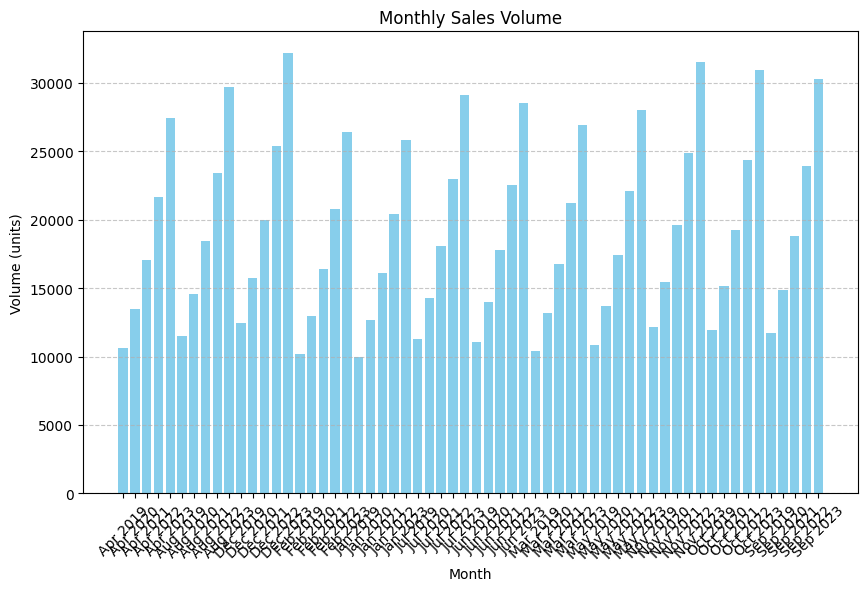

In [48]:
# Group by month and calculate total volume
monthly_volume = df_1.groupby(df_1['Month'].dt.strftime('%b %Y'))['Volume (units)'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_volume.index, monthly_volume, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Volume (units)')
plt.title('Monthly Sales Volume')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [49]:
monthly_volume.head()

Month
Apr 2019    10612
Apr 2020    13459
Apr 2021    17069
Apr 2022    21647
Apr 2023    27454
Name: Volume (units), dtype: int64

In [50]:
# Convert the series to a DataFrame and reset the index
df_monthly = monthly_volume.reset_index()
df_monthly.columns = ['Month', 'Volume (units)']

print(df_monthly)

       Month  Volume (units)
0   Apr 2019           10612
1   Apr 2020           13459
2   Apr 2021           17069
3   Apr 2022           21647
4   Apr 2023           27454
5   Aug 2019           11487
6   Aug 2020           14568
7   Aug 2021           18476
8   Aug 2022           23432
9   Aug 2023           29717
10  Dec 2019           12434
11  Dec 2020           15769
12  Dec 2021           19999
13  Dec 2022           25363
14  Dec 2023           32167
15  Feb 2019           10200
16  Feb 2020           12936
17  Feb 2021           16406
18  Feb 2022           20807
19  Feb 2023           26388
20  Jan 2019           10000
21  Jan 2020           12682
22  Jan 2021           16084
23  Jan 2022           20399
24  Jan 2023           25871
25  Jul 2019           11262
26  Jul 2020           14282
27  Jul 2021           18114
28  Jul 2022           22972
29  Jul 2023           29135
30  Jun 2019           11041
31  Jun 2020           14002
32  Jun 2021           17758
33  Jun 2022  

In [51]:
df_monthly.columns

Index(['Month', 'Volume (units)'], dtype='object')

In [52]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

# Objective function: P = 25x + 150y
def objective(x):
    return -(25 * x[0] + 150 * x[1])  # Minimize the negative profit


def constraint1(x):
    return 0.9 * x[0] + 0.75 * (1 - x[0]) - x[1]

def constraint2(x):
    return x[0] - 0.9 * (1 - x[1])

def constraint3(x):
    return x[1]

def constraint4(x):
    return x[0] - 0.1

def constraint5(x):
    return x[1] - 0.1

# Initial guess
x0 = np.array([0.5, 0.5])

# Bounds for x and y (0 <= x, y <= 1)
bounds = [(0, 1), (0, 1)]

# Constraints
constraints = [
    {'type': 'eq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2},
    {'type': 'eq', 'fun': constraint3},
    {'type': 'ineq', 'fun': constraint4},
    {'type': 'ineq', 'fun': constraint5}
]

# Run optimization for each month and print results
for index, row in df_monthly.iterrows():
    month, volume = row['Month'], row['Volume (units)']
    result = minimize(objective, x0, bounds=bounds, constraints=constraints)
    x_optimal, y_optimal = result.x
    profit_max = -result.fun
    print(f"Month: {month}")
    print(f"Optimal cash loans (x): {x_optimal * volume:.2f}")
    print(f"Optimal TV upgrades (y): {y_optimal * volume:.2f}")
    print(f"Maximum profit: ${profit_max:.2f}")
    print("-----")


Month: Apr 2019
Optimal cash loans (x): 4814.39
Optimal TV upgrades (y): 4814.39
Maximum profit: $79.39
-----
Month: Apr 2020
Optimal cash loans (x): 6105.99
Optimal TV upgrades (y): 6105.99
Maximum profit: $79.39
-----
Month: Apr 2021
Optimal cash loans (x): 7743.76
Optimal TV upgrades (y): 7743.76
Maximum profit: $79.39
-----
Month: Apr 2022
Optimal cash loans (x): 9820.68
Optimal TV upgrades (y): 9820.68
Maximum profit: $79.39
-----
Month: Apr 2023
Optimal cash loans (x): 12455.16
Optimal TV upgrades (y): 12455.16
Maximum profit: $79.39
-----
Month: Aug 2019
Optimal cash loans (x): 5211.35
Optimal TV upgrades (y): 5211.35
Maximum profit: $79.39
-----
Month: Aug 2020
Optimal cash loans (x): 6609.12
Optimal TV upgrades (y): 6609.12
Maximum profit: $79.39
-----
Month: Aug 2021
Optimal cash loans (x): 8382.08
Optimal TV upgrades (y): 8382.08
Maximum profit: $79.39
-----
Month: Aug 2022
Optimal cash loans (x): 10630.48
Optimal TV upgrades (y): 10630.48
Maximum profit: $79.39
-----
Month:

tried reducing the constrains to the ones that I can fully managae and deeply understand

In [58]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd


def objective(x, month):
    discount_factor = (1 + 0.15)**(-(month/12))  # Discount factor for the month
    return -(25 * x[0] + 150 * x[1]) * discount_factor  # Apply the discount factor to the profit

# Constraint functions
def constraint1(x):
    return x[0] - 0.9  # 90% of customers are eligible for a cash loan

def constraint2(x):
    return x[1] - 0.75 * (1 - 0.2 * x[0])  # Eligibility for TV upgrades decreases by 20 percentage points for each cash loan

def constraint3(x):
    return x[0] + x[1] - 1  # The total number of loans sold cannot exceed the total volume

# Initial guess
x0 = np.array([0.5, 0.5])

# Bounds for x and y (0 <= x, y <= 1)
bounds = [(0, 1), (0, 1)]

# Constraints
constraints = [
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2},
    {'type': 'eq', 'fun': constraint3}
]

# Run optimization for each month and print results
for index, row in df_monthly.iterrows():
    month, volume = row['Month'], row['Volume (units)']
    # Convert month to a numerical format (1 for January, 2 for February, etc.)
    month_num = pd.to_datetime(month).month
    result = minimize(objective, x0, args=(month_num), bounds=bounds, constraints=constraints)
    x_optimal, y_optimal = result.x
    profit_max = -result.fun
    print(f"Month: {month}")
    print(f"Optimal cash loans (x): {x_optimal * volume:.2f}")
    print(f"Optimal TV upgrades (y): {y_optimal * volume:.2f}")
    print(f"Maximum profit (discounted): ${profit_max:.2f}")
    print("-----")



Month: Apr 2019
Optimal cash loans (x): 5306.00
Optimal TV upgrades (y): 5306.00
Maximum profit (discounted): $83.52
-----
Month: Apr 2020
Optimal cash loans (x): 6729.50
Optimal TV upgrades (y): 6729.50
Maximum profit (discounted): $83.52
-----
Month: Apr 2021
Optimal cash loans (x): 8534.50
Optimal TV upgrades (y): 8534.50
Maximum profit (discounted): $83.52
-----
Month: Apr 2022
Optimal cash loans (x): 10823.50
Optimal TV upgrades (y): 10823.50
Maximum profit (discounted): $83.52
-----
Month: Apr 2023
Optimal cash loans (x): 13727.00
Optimal TV upgrades (y): 13727.00
Maximum profit (discounted): $83.52
-----
Month: Aug 2019
Optimal cash loans (x): 5743.50
Optimal TV upgrades (y): 5743.50
Maximum profit (discounted): $79.72
-----
Month: Aug 2020
Optimal cash loans (x): 7284.00
Optimal TV upgrades (y): 7284.00
Maximum profit (discounted): $79.72
-----
Month: Aug 2021
Optimal cash loans (x): 9238.00
Optimal TV upgrades (y): 9238.00
Maximum profit (discounted): $79.72
-----
Month: Aug 2

### Final algorithm

adjusting he method of optimization with the method parameter. Let’s try using the ‘SLSQP’ method, which stands for Sequential Least Squares Programming, a method suitable for constrained linear programming problems.

As for the initial guess, it’s often a good idea to start with a feasible point that satisfies all the constraints. In this case, since the constraints are that both x and y should be between 0 and 1, and their sum should be 1, a reasonable initial guess might be [0.5, 0.5]. However, if this doesn’t lead to good results, you could try other guesses like [0.6, 0.4], [0.7, 0.3]

In [60]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

# Objective function: P = 25x + 150y
# x in my case is the cashloan and y is the tv upgrade summed to get me my profittt
def objective(x, month):
    cash_loan_profit = 25 * x[0]
    tv_upgrade_profit = 150 * x[1]
    discount_factor = (1 + 0.15)**(-(month/12))  # Discount factor for the month
    return -(cash_loan_profit + tv_upgrade_profit * discount_factor)  #assumption explained below


# Constraint functions
def constraint1(x):
    return x[0] - 0.9  # 90% of customers are eligible for a cash loan

def constraint2(x):
    return x[1] - 0.75 * (1 - 0.2 * x[0])  # Eligibility for TV upgrades decreases by 20 percentage points for each cash loan

def constraint3(x):
    return x[0] + x[1] - 1  # The total number of loans sold cannot exceed the total volume

# # Initial guess
# x0 = np.array([0.5, 0.5])

# Bounds for x and y (0 <= x, y <= 1)
bounds = [(0, 1), (0, 1)]

# Constraints
constraints = [
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2},
    {'type': 'eq', 'fun': constraint3}
]

# # Run optimization for each month and print results
# for index, row in df_monthly.iterrows():
#     month, volume = row['Month'], row['Volume (units)']
#     # Convert month to a numerical format (1 for January, 2 for February, etc.)
#     month_num = pd.to_datetime(month).month
#     result = minimize(objective, x0, args=(month_num), bounds=bounds, constraints=constraints)
#     x_optimal, y_optimal = result.x
#     profit_max = -result.fun
#     print(f"Month: {month}")
#     print(f"Optimal cash loans (x): {x_optimal * volume:.2f}")
#     print(f"Optimal TV upgrades (y): {y_optimal * volume:.2f}")
#     print(f"Maximum profit (discounted): ${profit_max:.2f}")
#     print("-----")


# Initial guess
x0 = np.array([0.6, 0.4])

# Run optimization for each month and print results
for index, row in df_monthly.iterrows():
    month, volume = row['Month'], row['Volume (units)']
    # Convert month to a numerical format (1 for January, 2 for February, etc.)
    month_num = pd.to_datetime(month).month
    result = minimize(objective, x0, args=(month_num), bounds=bounds, constraints=constraints, method='SLSQP')
    x_optimal, y_optimal = result.x
    profit_max = -result.fun
    print(f"Month: {month}")
    print(f"Optimal cash loans (x): {x_optimal * volume:.2f}")
    print(f"Optimal TV upgrades (y): {y_optimal * volume:.2f}")
    print(f"Maximum profit (discounted): ${profit_max:.2f}")
    print("-----")



Month: Apr 2019
Optimal cash loans (x): 6367.20
Optimal TV upgrades (y): 4244.80
Maximum profit (discounted): $72.27
-----
Month: Apr 2020
Optimal cash loans (x): 8075.40
Optimal TV upgrades (y): 5383.60
Maximum profit (discounted): $72.27
-----
Month: Apr 2021
Optimal cash loans (x): 10241.40
Optimal TV upgrades (y): 6827.60
Maximum profit (discounted): $72.27
-----
Month: Apr 2022
Optimal cash loans (x): 12988.20
Optimal TV upgrades (y): 8658.80
Maximum profit (discounted): $72.27
-----
Month: Apr 2023
Optimal cash loans (x): 16472.40
Optimal TV upgrades (y): 10981.60
Maximum profit (discounted): $72.27
-----
Month: Aug 2019
Optimal cash loans (x): 6889.96
Optimal TV upgrades (y): 4597.04
Maximum profit (discounted): $69.68
-----
Month: Aug 2020
Optimal cash loans (x): 8737.95
Optimal TV upgrades (y): 5830.05
Maximum profit (discounted): $69.68
-----
Month: Aug 2021
Optimal cash loans (x): 11081.99
Optimal TV upgrades (y): 7394.01
Maximum profit (discounted): $69.68
-----
Month: Aug 

## answering questions and stating my assumptions

assumptions return -(cash_loan_profit + tv_upgrade_profit * discount_factor)  
The discount factor is applied to the TV upgrade profit in this case because the TV upgrades extend the duration of the loan, meaning the profit from these upgrades is realized in the future. The discount factor accounts for the time value of money, which is the concept that money available today is worth more than the same amount in the future due to its potential earning capacity.

In contrast, the cash loans do not extend the duration of the loan, so their profit is realized immediately and does not need to be discounted.

1) printed above

2) printed above

3) **Adjusting Business Rules to Improve Profitability:** There are several ways we could potentially adjust the business rules to improve profitability. Here are a few ideas:
    - **Increase Conversion Rates:** By improving the marketing strategy or offering incentives, we could potentially increase the conversion rates, i.e., the percentage of eligible customers who decide to purchase an additional loan.
    - **Expand Eligibility:** We could consider relaxing the eligibility criteria for cash loans and TV upgrades. This could potentially increase the pool of eligible customers and thus increase sales.
    - **Introduce New Products:** We could consider introducing new types of loans that could attract different segments of customers and thus increase overall sales.

4) **Operational Improvements to Improve Profitability:** Here are a few assumptions that are most sensitive and could be investigated to improve profitability:
    - **Eligibility Criteria:** The eligibility criteria for cash loans and TV upgrades have a significant impact on the number of loans that can be sold. Therefore, understanding the credit performance and timing factors that influence eligibility could potentially lead to operational improvements.
    - **Conversion Rates:** The conversion rates, i.e., the percentage of eligible customers who decide to purchase an additional loan, are also a sensitive assumption. Investigating the factors that influence conversion rates could lead to operational improvements.
    - **Loan Duration:** The duration of the loans influences the timing of the cash flows and thus the profitability. Therefore, understanding the factors that influence loan duration could potentially lead to operational improvements.



## rough work different screnarios

In [54]:
# import numpy as np
# from scipy.optimize import minimize
# import pandas as pd

# # Objective function: P = 25x + 150y, where x is the number of cash loans, y is the number of TV upgrades
# def objective(x, volume):
#     return -(25 * x[0] + 150 * x[1]) * (1 + 0.15)**(-(1/12))

# # Constraint functions
# def constraint_eligibility_upsell(x, volume):
#     return 0.9 * volume - x[0]

# def constraint_eligibility_tv_upgrade(x, volume):
#     return (0.75 - 0.20 * x[0]) * volume - x[1]

# def constraint_conversion_upsell(x):
#     return x[0] - 0.9 * x[0]

# def constraint_conversion_tv_upgrade(x):
#     return x[1] - 0.5 * x[1]

# # Bounds for x and y (0 <= x, y <= volume)
# bounds = [(0, None), (0, None)]

# # Constraints
# constraints = [
#     {'type': 'ineq', 'fun': constraint_eligibility_upsell, 'args': (volume,)},
#     {'type': 'ineq', 'fun': constraint_eligibility_tv_upgrade, 'args': (volume,)},
#     {'type': 'eq', 'fun': constraint_conversion_upsell},
#     {'type': 'eq', 'fun': constraint_conversion_tv_upgrade}
# ]


# # Run optimization for each month and print results
# for index, row in df_monthly.iterrows():
#     month, volume = row['Month'], row['Volume (units)']
#     result = minimize(objective, x0, args=(volume,), bounds=bounds, constraints=constraints)
#     x_optimal, y_optimal = result.x
#     profit_max = -result.fun
#     print(f"Month: {month}")
#     print(f"Optimal cash loans (x): {x_optimal:.2f}")
#     print(f"Optimal TV upgrades (y): {y_optimal:.2f}")
#     print(f"Maximum profit: ${profit_max:.2f}")
#     print("-----")


Month: Apr 2019
Optimal cash loans (x): 0.00
Optimal TV upgrades (y): 0.00
Maximum profit: $0.00
-----
Month: Apr 2020
Optimal cash loans (x): 0.00
Optimal TV upgrades (y): 0.00
Maximum profit: $0.00
-----
Month: Apr 2021
Optimal cash loans (x): 0.00
Optimal TV upgrades (y): 0.00
Maximum profit: $0.00
-----
Month: Apr 2022
Optimal cash loans (x): 0.00
Optimal TV upgrades (y): 0.00
Maximum profit: $0.00
-----
Month: Apr 2023
Optimal cash loans (x): 0.00
Optimal TV upgrades (y): 0.00
Maximum profit: $0.00
-----
Month: Aug 2019
Optimal cash loans (x): 0.00
Optimal TV upgrades (y): 0.00
Maximum profit: $0.00
-----
Month: Aug 2020
Optimal cash loans (x): 0.00
Optimal TV upgrades (y): 0.00
Maximum profit: $0.00
-----
Month: Aug 2021
Optimal cash loans (x): 0.00
Optimal TV upgrades (y): 0.00
Maximum profit: $0.00
-----
Month: Aug 2022
Optimal cash loans (x): 0.00
Optimal TV upgrades (y): 0.00
Maximum profit: $0.00
-----
Month: Aug 2023
Optimal cash loans (x): 0.00
Optimal TV upgrades (y): 0.0

In [56]:
# import numpy as np
# from scipy.optimize import minimize
# import pandas as pd

# # Define the objective function (profit function)
# def objective(vars, volume):
#     cash_loans, tv_upgrades = vars
#     # Apply the monthly discount rate to the profit
#     monthly_discount_rate = ((1 + 0.15)**(1/12)) - 1
#     return -((25 * cash_loans + 150 * tv_upgrades) / (1 + monthly_discount_rate))

# # Constraints
# def constraint_cash_loan_eligibility(vars, volume):
#     cash_loans, _ = vars
#     return 0.9 * volume - cash_loans

# def constraint_tv_upgrade_eligibility(vars, volume):
#     cash_loans, tv_upgrades = vars
#     eligible_customers = (0.75 - 0.20 * cash_loans) * volume
#     return eligible_customers - tv_upgrades

# def constraint_conversion_rates(vars, volume):
#     cash_loans, tv_upgrades = vars
#     return 0.9 * cash_loans + 0.5 * tv_upgrades - volume

# # Initial guess
# x0 = np.array([1, 1])

# # Bounds for cash loans and TV upgrades
# bounds = [(0, None), (0, None)]


# # Run optimization for each month and print results
# for index, row in df_monthly.iterrows():
#     month, volume = row['Month'], row['Volume (units)']
#     # Define the constraints
#     constraints = [
#         {'type': 'ineq', 'fun': constraint_cash_loan_eligibility, 'args': (volume,)},
#         {'type': 'ineq', 'fun': constraint_tv_upgrade_eligibility, 'args': (volume,)},
#         {'type': 'eq', 'fun': constraint_conversion_rates, 'args': (volume,)}
#     ]
#     # Perform the optimization
#     result = minimize(objective, x0, args=(volume,), bounds=bounds, constraints=constraints)
#     if result.success:
#         optimal_cash_loans, optimal_tv_upgrades = result.x
#         max_profit = -objective(result.x, volume)
#         print(f"Month: {month}")
#         print(f"Optimal cash loans: {optimal_cash_loans:.2f}")
#         print(f"Optimal TV upgrades: {optimal_tv_upgrades:.2f}")
#         print(f"Maximum profit: ${max_profit:.2f}")
#         print("-----")
#     else:
#         print(f"Optimization failed for {month}")


Optimization failed for Apr 2019
Optimization failed for Apr 2020
Optimization failed for Apr 2021
Optimization failed for Apr 2022
Optimization failed for Apr 2023
Optimization failed for Aug 2019
Optimization failed for Aug 2020
Optimization failed for Aug 2021
Optimization failed for Aug 2022
Optimization failed for Aug 2023
Optimization failed for Dec 2019
Optimization failed for Dec 2020
Optimization failed for Dec 2021
Optimization failed for Dec 2022
Optimization failed for Dec 2023
Optimization failed for Feb 2019
Optimization failed for Feb 2020
Optimization failed for Feb 2021
Optimization failed for Feb 2022
Optimization failed for Feb 2023
Optimization failed for Jan 2019
Optimization failed for Jan 2020
Optimization failed for Jan 2021
Optimization failed for Jan 2022
Optimization failed for Jan 2023
Optimization failed for Jul 2019
Optimization failed for Jul 2020
Optimization failed for Jul 2021
Optimization failed for Jul 2022
Optimization failed for Jul 2023
Optimizati

In [55]:
# import numpy as np
# from scipy.optimize import minimize
# import pandas as pd

# # Define the objective function (profit function)
# def objective(vars, volume):
#     cash_loans, tv_upgrades = vars
#     # Apply the monthly discount rate to the profit
#     monthly_discount_rate = ((1 + 0.15)**(1/12)) - 1
#     return -((25 * cash_loans + 150 * tv_upgrades) / (1 + monthly_discount_rate))

# # Constraints
# def constraint_cash_loan_eligibility(vars, volume):
#     cash_loans, tv_upgrades = vars
#     return 0.9 * volume - cash_loans

# def constraint_tv_upgrade_eligibility(vars, volume):
#     cash_loans, tv_upgrades = vars
#     return (0.75 - 0.20 * cash_loans) * volume - tv_upgrades

# def constraint_cash_loan_conversion(vars):
#     cash_loans, tv_upgrades = vars
#     return cash_loans - 0.9 * cash_loans

# def constraint_tv_upgrade_conversion(vars):
#     cash_loans, tv_upgrades = vars
#     return tv_upgrades - 0.5 * tv_upgrades

# # Initial guess
# x0 = np.array([1, 1])

# # Bounds for cash loans and TV upgrades
# bounds = [(0, None), (0, None)]


# # Run optimization for each month and print results
# for index, row in df_monthly.iterrows():
#     month, volume = row['Month'], row['Volume (units)']
#     # Define the constraints
#     constraints = [
#         {'type': 'ineq', 'fun': constraint_cash_loan_eligibility, 'args': (volume,)},
#         {'type': 'ineq', 'fun': constraint_tv_upgrade_eligibility, 'args': (volume,)},
#         {'type': 'eq', 'fun': constraint_cash_loan_conversion},
#         {'type': 'eq', 'fun': constraint_tv_upgrade_conversion}
#     ]
#     # Perform the optimization
#     result = minimize(objective, x0, args=(volume,), bounds=bounds, constraints=constraints)
#     if result.success:
#         optimal_cash_loans, optimal_tv_upgrades = result.x
#         max_profit = -objective(result.x, volume)
#         print(f"Month: {month}")
#         print(f"Optimal cash loans: {optimal_cash_loans:.2f}")
#         print(f"Optimal TV upgrades: {optimal_tv_upgrades:.2f}")
#         print(f"Maximum profit: ${max_profit:.2f}")
#         print("-----")
#     else:
#         print(f"Optimization failed for {month}")


Month: Apr 2019
Optimal cash loans: 0.00
Optimal TV upgrades: 0.00
Maximum profit: $0.00
-----
Month: Apr 2020
Optimal cash loans: 0.00
Optimal TV upgrades: 0.00
Maximum profit: $0.00
-----
Month: Apr 2021
Optimal cash loans: 0.00
Optimal TV upgrades: 0.00
Maximum profit: $0.00
-----
Month: Apr 2022
Optimal cash loans: 0.00
Optimal TV upgrades: 0.00
Maximum profit: $0.00
-----
Month: Apr 2023
Optimal cash loans: 0.00
Optimal TV upgrades: 0.00
Maximum profit: $0.00
-----
Month: Aug 2019
Optimal cash loans: 0.00
Optimal TV upgrades: 0.00
Maximum profit: $0.00
-----
Month: Aug 2020
Optimal cash loans: 0.00
Optimal TV upgrades: 0.00
Maximum profit: $0.00
-----
Month: Aug 2021
Optimal cash loans: 0.00
Optimal TV upgrades: 0.00
Maximum profit: $0.00
-----
Month: Aug 2022
Optimal cash loans: 0.00
Optimal TV upgrades: 0.00
Maximum profit: $0.00
-----
Month: Aug 2023
Optimal cash loans: 0.00
Optimal TV upgrades: 0.00
Maximum profit: $0.00
-----
Month: Dec 2019
Optimal cash loans: 0.00
Optimal T

In [53]:
# # Constants
# ELIGIBILITY_RATE = 0.9
# CASH_LOAN_CONVERSION = 0.9
# TV_UPGRADE_CONVERSION = 0.5
# CASH_LOAN_PROFIT = 25
# TV_UPGRADE_PROFIT = 150
# DISCOUNT_RATE = 0.15

# # Calculate eligibility
# df_1['Eligible_for_Cash_Loan'] = df_1['Volume (units)'] * ELIGIBILITY_RATE

# # Apply conversion rates
# df_1['Expected_Cash_Loan_Sales'] = df_1['Eligible_for_Cash_Loan'] * CASH_LOAN_CONVERSION
# df_1['Expected_TV_Upgrade_Sales'] = df_1['Eligible_for_Cash_Loan'] * TV_UPGRADE_CONVERSION  # Adjust based on eligibility for TV upgrades

# # Calculate discounted profit
# df_1['Cash_Loan_Profit'] = df_1['Expected_Cash_Loan_Sales'] * CASH_LOAN_PROFIT / (1 + DISCOUNT_RATE)
# df_1['TV_Upgrade_Profit'] = df_1['Expected_TV_Upgrade_Sales'] * TV_UPGRADE_PROFIT / (1 + DISCOUNT_RATE)

# # Total profit
# df_1['Total_Profit'] = df_1['Cash_Loan_Profit'] + df_1['TV_Upgrade_Profit']


Here’s the tricky part: we want to maximize our profit, but the optimization algorithm we’re using minimizes functions.
So, we turn our profit into a negative number (like flipping a coin) to make it work.
When the algorithm minimizes the negative profit, it’s actually maximizing our real profit!

using my own data ignore this

In [62]:
# Sample monthly sales volume data
monthly_sales = {
    '2019-01-31': 10000,
    '2019-02-28': 10200,
    '2019-03-31': 10404,
    '2019-04-30': 10612,
    '2019-05-31': 10824
}

# Function to run optimization for a given month
def optimize_monthly_sales(volume):
    # Objective function
    def objective(x):
        return -(25 * x[0] + 150 * x[1]) * volume

    # Constraints remain the same as your original model
    
    

    # Solve the optimization problem
    result = minimize(objective, x0, bounds=bounds, constraints=constraints)

    # Extract optimal values and calculate profit
    x_optimal, y_optimal = result.x
    profit_max = -result.fun

    return x_optimal, y_optimal, profit_max

# Run optimization for each month and print results
for month, volume in monthly_sales.items():
    x_optimal, y_optimal, profit_max = optimize_monthly_sales(volume)
    print(f"Month: {month}")
    print(f"Optimal cash loans (x): {x_optimal * volume:.2f}")
    print(f"Optimal TV upgrades (y): {y_optimal * volume:.2f}")
    print(f"Maximum profit: ${profit_max:.2f}")
    print("-----")


Month: 2019-01-31
Optimal cash loans (x): 6000.00
Optimal TV upgrades (y): 4000.00
Maximum profit: $750000.00
-----
Month: 2019-02-28
Optimal cash loans (x): 6120.00
Optimal TV upgrades (y): 4080.00
Maximum profit: $765000.00
-----
Month: 2019-03-31
Optimal cash loans (x): 6242.40
Optimal TV upgrades (y): 4161.60
Maximum profit: $780300.00
-----
Month: 2019-04-30
Optimal cash loans (x): 6367.20
Optimal TV upgrades (y): 4244.80
Maximum profit: $795900.00
-----
Month: 2019-05-31
Optimal cash loans (x): 6494.40
Optimal TV upgrades (y): 4329.60
Maximum profit: $811800.00
-----
